In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

c:\users\hwunrow\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Investigate Data

In [2]:
train_data = pd.read_csv("income_train.csv")
train_data.columns

Index(['Id', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Category'],
      dtype='object')

In [3]:
# group numeric and categorical features
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'Category']
categorical_features = ['workclass', 'education', 'martial-status', 'occupation', 'relationship', 'race', 
                        'sex', 'native-country']


In [4]:
# reformat target to 0 and 1
target = 'Category'
train_data.loc[train_data[target] == "<=50K", target] = 0
train_data.loc[train_data[target] == ">50K", target] = 1

Number low income individuals: 17304 (75.92%)
Number high income individuals: 5488 (24.08%)


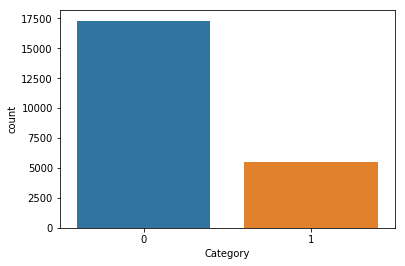

In [5]:
# Histogram of >50K and <=50K
sns.countplot(x=target, data=train_data, order=sorted(train_data[target].unique()))
low_income = train_data[train_data[target] == 0]
high_income = train_data[train_data[target] == 1]

print(f'Number low income individuals: {len(low_income)} ({len(low_income) * 100.0 / len(train_data):.2f}%)')
print(f'Number high income individuals: {len(high_income)} ({len(high_income) * 100.0 / len(train_data):.2f}%)')


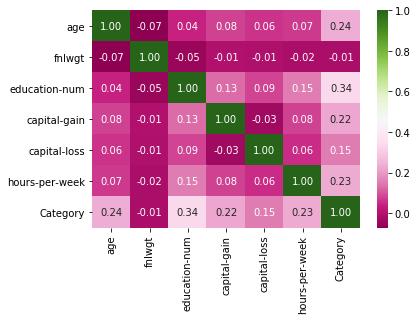

In [6]:
# correlation matric with numeric features
sns.heatmap(train_data[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "PiYG")

c:\users\hwunrow\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\hwunrow\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hwunrow\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weigh

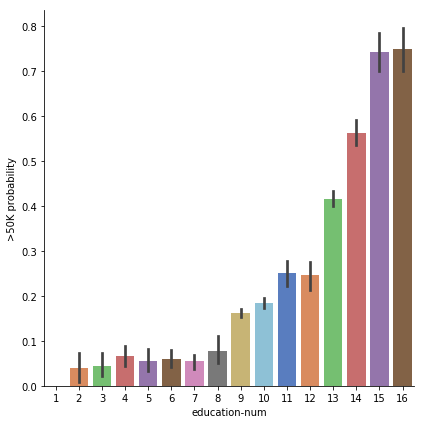

In [7]:
# look at education num
g = sns.factorplot(x="education-num",y="Category",data=train_data,kind="bar",size = 6,palette = "muted")
g = g.set_ylabels(">50K probability")

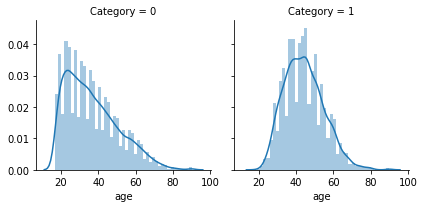

In [8]:
# look at age
g = sns.FacetGrid(train_data, col='Category')
g = g.map(sns.distplot, "age")

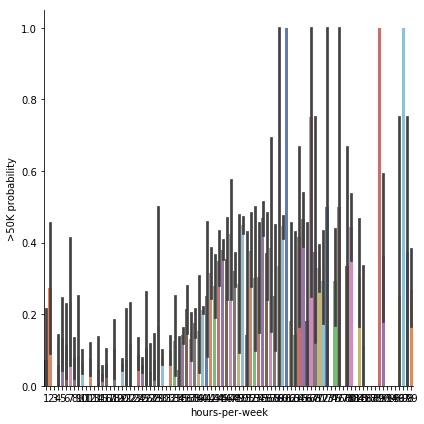

In [9]:
# look at hours-per week
g  = sns.factorplot(x="hours-per-week",y="Category",data=train_data,kind="bar",size = 6,palette = "muted")
g = g.set_ylabels(">50K probability")

In [10]:

categorical_features = ['workclass', 'education', 'martial-status', 'occupation', 'relationship', 'race', 
                        'sex', 'native-country']

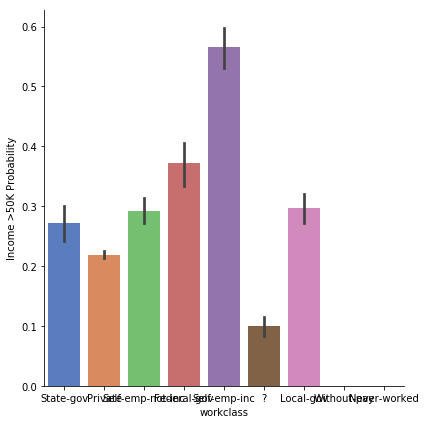

In [11]:
# look at workclass
g = sns.factorplot(x="workclass",y="Category",data=train_data,kind="bar", size = 6 ,
palette = "muted")
g = g.set_ylabels("Income >50K Probability")

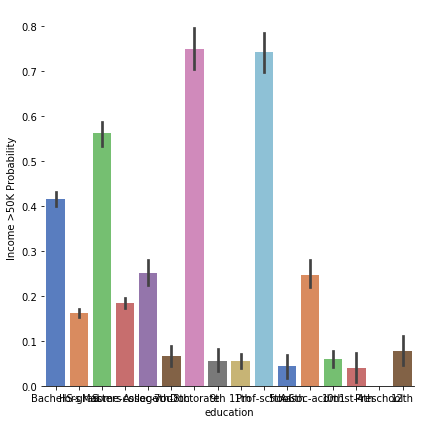

In [12]:
# look at education
g = sns.factorplot(x="education",y="Category",data=train_data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

['Never-married' 'Divorced' 'Married-civ-spouse' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']


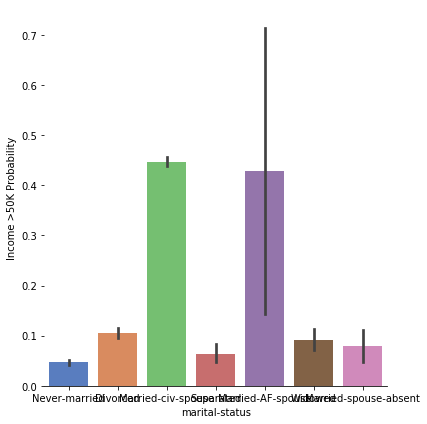

In [13]:
# look at martial-status
print(train_data['marital-status'].unique())
g = sns.factorplot(x="marital-status",y="Category",data=train_data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

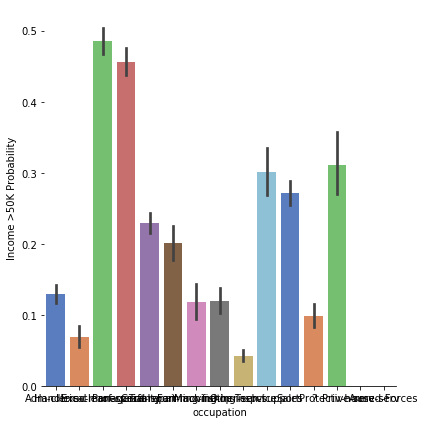

In [14]:
# look at occupation
g = sns.factorplot(x="occupation",y="Category",data=train_data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")

array(['Not-in-family', 'Husband', 'Own-child', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

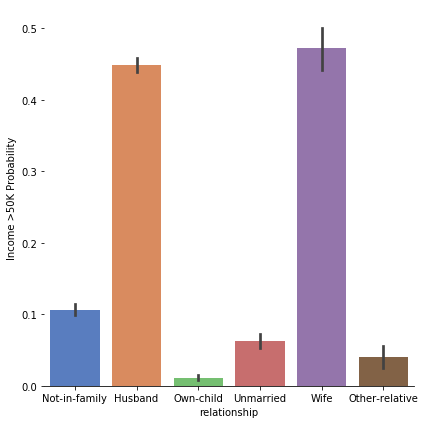

In [15]:
# look at relationship
g = sns.factorplot(x="relationship",y="Category",data=train_data,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
train_data['relationship'].unique()

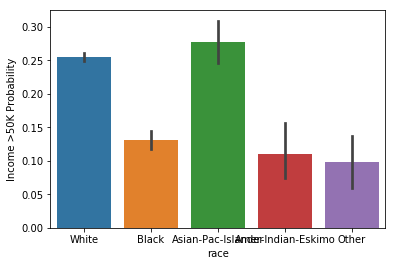

In [16]:
# look at race
g = sns.barplot(x="race",y="Category",data=train_data)
g = g.set_ylabel("Income >50K Probability")

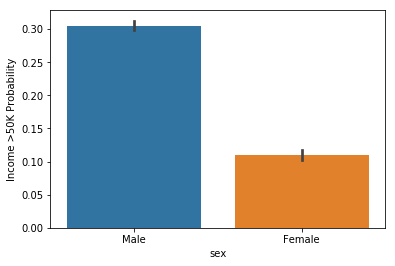

In [17]:
# look at sex
g = sns.barplot(x="sex",y="Category",data=train_data)
g = g.set_ylabel("Income >50K Probability")

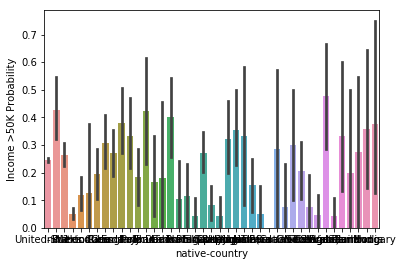

In [18]:
# look at native-country
g = sns.barplot(x="native-country",y="Category",data=train_data)
g = g.set_ylabel("Income >50K Probability")

## Encode Variables

In [19]:
# Convert Sex value to 0 and 1
train_data["sex"] = train_data["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
train_data["marital-status"] = train_data["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
train_data["marital-status"] = train_data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
train_data["marital-status"] = train_data["marital-status"].map({"Married":1, "Single":0})
train_data["marital-status"] = train_data["marital-status"].astype(int)

# group together White and Asians
train_data['race'] = train_data['race'].map({'White': 1, 'Asian-Pac-Islander': 1, 'Black':0, 'Amer-Indian-Eskimo':0, 'Other':0})

In [20]:
# Drop the data you don't want to use
train_data.drop(labels=["education","relationship"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
train_data.head()
features = ['age', 'fnlwgt', 'education-num', 'martial-status', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

Dataset with Dropped Labels


,Id,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,Category
0,24859,39,77516,13,0,0,2174,0,40,0
1,27412,38,215646,9,0,0,0,0,40,0
2,3074,52,209642,9,1,0,0,0,45,1
3,24024,31,45781,14,0,1,14084,0,50,1
4,9623,42,159449,13,1,0,5178,0,40,1


# Train Model

In [31]:
# Split-out Validation Dataset and Create Test Variables
array = train_data.values
X = array[:,1:9]
Y = array[:,9]
print('Split Data: X')
print(X)
print('Split Data: Y')
print(Y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, KNN, CART, RF)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('GB', GradientBoostingClassifier()))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: X
[[    39  77516     13 ...   2174      0     40]
 [    38 215646      9 ...      0      0     40]
 [    52 209642      9 ...      0      0     45]
 ...
 [    40 154374      9 ...      0      0     40]
 [    58 151910      9 ...      0      0     40]
 [    52 287927      9 ...  15024      0     40]]
Split Data: Y
[0 0 1 ... 1 0 1]


C:\Users\hwunrow\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hwunrow\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hwunrow\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hwunrow\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hwunrow\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:

LR: 0.798991 (0.007524)
KNN: 0.772062 (0.006738)
CART: 0.801569 (0.010278)
RF: 0.842867 (0.008760)
GB: 0.859211 (0.010565)


In [36]:
# grid search for Gradient Boosting model parameters
max_depth = np.array([4, 5, 6])
n_estimators = np.array([100, 150, 200])
learning_rate = np.array([0.1, 0.075, 0.05])
max_features = np.array([3, 4, 5])
param_grid = dict(max_depth=max_depth,
                  n_estimators=n_estimators,
                  learning_rate=learning_rate,
                  max_features=max_features)

classifier = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(classifier, param_grid=param_grid, cv=kfold, n_jobs=30)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.862667 using {'learning_rate': 0.075, 'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
0.860528 (0.011048) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 3, 'n_estimators': 100}
0.861350 (0.010412) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 3, 'n_estimators': 150}
0.861405 (0.010703) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 3, 'n_estimators': 200}
0.861899 (0.010980) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 4, 'n_estimators': 100}
0.861679 (0.011162) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 4, 'n_estimators': 150}
0.862392 (0.009950) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 4, 'n_estimators': 200}
0.861241 (0.010952) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 5, 'n_estimators': 100}
0.862228 (0.011046) with: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 5, 'n_estimators': 150}
0.861405 (0.009613) with: {'learning_rate': 0.1, 'max_dept

In [24]:
# grid search for Random Forest model parameters
# Tune Random Forest
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,
                  max_features=max_features)
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.843087 using {'max_features': 4, 'n_estimators': 150}
0.841825 (0.007815) with: {'max_features': 1, 'n_estimators': 50}
0.841935 (0.008379) with: {'max_features': 1, 'n_estimators': 100}
0.841990 (0.008704) with: {'max_features': 1, 'n_estimators': 150}
0.842264 (0.009286) with: {'max_features': 1, 'n_estimators': 200}
0.843032 (0.010177) with: {'max_features': 1, 'n_estimators': 250}
0.840125 (0.007245) with: {'max_features': 2, 'n_estimators': 50}
0.842483 (0.010143) with: {'max_features': 2, 'n_estimators': 100}
0.840070 (0.009433) with: {'max_features': 2, 'n_estimators': 150}
0.842483 (0.009482) with: {'max_features': 2, 'n_estimators': 200}
0.841112 (0.009648) with: {'max_features': 2, 'n_estimators': 250}
0.841935 (0.009112) with: {'max_features': 3, 'n_estimators': 50}
0.841496 (0.009560) with: {'max_features': 3, 'n_estimators': 100}
0.842483 (0.009718) with: {'max_features': 3, 'n_estimators': 150}
0.841386 (0.008696) with: {'max_features': 3, 'n_estimators': 200}
0.8

In [28]:
features = ['age', 'fnlwgt', 'education-num', 'marital-status', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week']

In [29]:
# create final model
random_forest = RandomForestClassifier(n_estimators=150, max_features=4)
random_forest.fit(train_data[features], train_data[target])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Make Predictions

In [30]:
test_data = pd.read_csv('income_test.csv')

# encode sex and marial-status
test_data["sex"] = test_data["sex"].map({"Male": 0, "Female":1})

# Create Married Column - Binary Yes(1) or No(0)
test_data["marital-status"] = test_data["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
test_data["marital-status"] = test_data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
test_data["marital-status"] = test_data["marital-status"].map({"Married":1, "Single":0})
test_data["marital-status"] = test_data["marital-status"].astype(int)

predictions = random_forest.predict(test_data[features])

to_save = test_data[['Id']].copy()
to_save.loc[:, 'Category'] = predictions
to_save.loc[to_save['Category'] == 0, 'Category'] = "<=50K"
to_save.loc[to_save['Category'] == 1, 'Category'] = ">50K"
to_save.to_csv('submission.csv', index=False)